In [259]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import os
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline

In [2]:
#from xml.dom import minidom
#arquivo = open('data/cpfl/2018/Publicações  PARCERIA TERADATA AnoPublicação 2018 arquivo 1-3.xml','r')
#xmldoc = minidom.parse(arquivo)

## Classe Preparação

In [237]:
class Prep:
    
    def __init__(self,numero,processos,publicacoes):
        self.numero = numero
        self.processos = processos
        self.publicacoes = publicacoes
        self.big_table = big_table
        #self.val = None
        
    def prep_num_processo(self):
        proc = self.numero #Fonte: andamentos
        id_proc = np.array([self.numero]) #Fonte: cabeçalho
        
        #Numero do processo - Fonte: cabeçalho
        df_id = pd.DataFrame(id_proc,columns=['id'])
        
        #Quebra do numero do processo - Fonte: andamentos
        p = proc.split('.')

        num = int(p[0].split('-')[0]+p[0].split('-')[1])
        ano_inicio = int(p[1])
        ramo = int(p[2])
        tribunal = int(p[3])
        vara_orig = int(p[4])

        arr = np.array([[num, ano_inicio, ramo, tribunal, vara_orig]])

        df_proc = pd.DataFrame(arr,columns=['num_seq','ano_inicio','ramo','tribunal','vara_orig'])
        
        #Concatenacao
        df = pd.concat([df_id, df_proc],axis=1)
        
        return df
    
    def prep_base(self):
        classe = self.processos[0]['classe']
        classe_area = self.processos[0]['classe_area']
        assunto = self.processos[0]['assunto']
        outros_assuntos = self.processos[0]['outros_assuntos']
        juiz = self.processos[0]['juiz']
        valor = self.processos[0]['valor']
        audiencias = self.processos[0]['audiencias']
        incidentes = self.processos[0]['audiencias']
        total_andamentos = self.processos[0]['total_andamentos']

        df_base = pd.DataFrame(np.array([[classe, classe_area, assunto, outros_assuntos, juiz, audiencias, incidentes,valor,total_andamentos]]), columns=['classe', 'classe_area', 'assunto', 'outros_assuntos', 'juiz', 'audiencias', 'incidentes','valor','total_andamentos'])
        
        return df_base
    
    def prep_partes(self):
        a=np.array(self.processos[0]['partes'])
        a.size
        out_tipo = []
        out_reqte= []
        out_reqda = []
        for i in range(a.size):
            tipo = self.processos[0]['partes'][i]['tipo']
            if tipo == 'Reqte' or tipo == 'Autor' or tipo == 'Exeqte':
                out_reqte.append(self.processos[0]['partes'][i]['nome'])
            elif tipo == 'Reqda' or tipo == 'Reqdo' or tipo == 'Ré' or tipo == 'Réu' or tipo == 'Exectdo' or tipo == 'TerIntCer':
                out_reqda.append(self.processos[0]['partes'][i]['nome'])
        arr=[[out_reqte, out_reqda]]
        df_partes = pd.DataFrame(arr,columns = ['Reqte','Reqdo'])
        
        return df_partes
    
    def prep_advogados(self):
        a=np.array(self.processos[0]['advogados'])
        a.size
        out_advogados = []
        for i in range(a.size):
            out_advogados.append(self.processos[0]['advogados'][i]['nome'])
        arr=[[out_advogados]]
        df_advogados = pd.DataFrame(arr,columns = ['Advogados'])
        
        return df_advogados
    
    def prep_andamentos(self):
        a=np.array(self.processos[0]['andamentos'])
        a.size
        out_data = []
        out_descricao = []
        out_anexo = []
        out_anexo_label = []
        out_anexo_conteudo = []
        for i in range(a.size):
            out_data.append(self.processos[0]['andamentos'][i]['data'])
            out_descricao.append(self.processos[0]['andamentos'][i]['descricao'])
            if processos[0]['andamentos'][i]['anexo'] == 'Não existe anexo':
                out_anexo_label.append(self.processos[0]['andamentos'][0]['anexo'])
                out_anexo_conteudo.append(self.processos[0]['andamentos'][0]['anexo'])
            else:
                out_anexo_label.append(self.processos[0]['andamentos'][i]['anexo']['label'])
                out_anexo_conteudo.append(self.processos[0]['andamentos'][i]['anexo']['conteudo'])        

        arr=[[out_data,out_descricao,out_anexo_label,out_anexo_conteudo]]
        df_andamentos = pd.DataFrame(arr,columns = ['dt_andamentos','andamentos','anexo_label','anexo_conteudo'])
        
        return df_andamentos
    
    def prep_peticoes(self):
        if processos[0]['peticoes'] is None:
            data = {}
            tipo = {}
        else:
            a=np.array(self.processos[0]['peticoes'])
            a.size
            data = []
            tipo = []
            for i in range(a.size):
                data.append(self.processos[0]['peticoes'][i]['data'])
                tipo.append(self.processos[0]['peticoes'][i]['tipo'])
            
        arr=[[data, tipo]]
        df_peticoes = pd.DataFrame(arr,columns = ['dt_peticoes','peticoes_tipo'])
        return df_peticoes
    
    def prep_publicacoes(self):
        a=np.array(self.publicacoes)
        total_publicacoes = a.size
        
        data = []
        numeroInstancia = []
        conteudo = []
        numeroCNJ = []
        numeroAntigo = []
        numeroUnificado = []
        numeroInstancia = []
        anoPublicacao = []
        dataPublicacao = []
        diario = []
        diarioUF = []
        cidadeComarcaDescricao = []
        varaDescricao  = []
        arquivada = []
        complemento = []
        conteudo = []
        despacho = []
        #Empresa
        codVinculo = []
        vinculo = []
        #Busca
        codTermo = []
        termoEncontrado = []
        buscaLote = []
        buscaLoteAno = []
        buscaLoteMes = []
        buscaLoteGrupo = []
        #Correcoes
        corrigido = []
        corrigidoCidade = []
        corrigidoConteudo = []
        corrigidoDespacho = []
        corrigidoNumero = []
        corrigidoOrgao = []
        corrigidoVara = []
        conferido = []
        for i in range(a.size):
            data.append(self.publicacoes[i]['dataPublicacao'])
            numeroInstancia.append(self.publicacoes[i]['numeroInstancia'])
            conteudo.append(self.publicacoes[i]['conteudo'])
            
            numeroCNJ.append(self.publicacoes[i]['numeroCNJ'])
            numeroAntigo.append(self.publicacoes[i]['numeroAntigo'])
            numeroUnificado.append(self.publicacoes[i]['numeroUnificado'])
            anoPublicacao.append(self.publicacoes[i]['anoPublicacao'])
            dataPublicacao.append(self.publicacoes[i]['dataPublicacao'])
            diario.append(self.publicacoes[i]['diario'])
            diarioUF.append(self.publicacoes[i]['diarioUF'])
            cidadeComarcaDescricao.append(self.publicacoes[i]['cidadeComarcaDescricao'])
            varaDescricao.append(self.publicacoes[i]['varaDescricao'])
            arquivada.append(self.publicacoes[i]['arquivada'])
            complemento.append(self.publicacoes[i]['complemento'])
            despacho.append(self.publicacoes[i]['despacho'])
            #Empresa
            codVinculo.append(self.publicacoes[i]['codVinculo'])
            vinculo.append(self.publicacoes[i]['vinculo'])
            #Busca
            codTermo.append(self.publicacoes[i]['codTermo'])
            termoEncontrado.append(self.publicacoes[i]['termoEncontrado'])
            buscaLote.append(self.publicacoes[i]['buscaLote'])
            buscaLoteAno.append(self.publicacoes[i]['buscaLoteAno'])
            buscaLoteMes.append(self.publicacoes[i]['buscaLoteMes'])
            buscaLoteGrupo.append(self.publicacoes[i]['buscaLoteGrupo'])
            #Correcoes
            corrigido.append(self.publicacoes[i]['corrigido'])
            corrigidoCidade.append(self.publicacoes[i]['corrigidoCidade'])
            corrigidoConteudo.append(self.publicacoes[i]['corrigidoConteudo'])
            corrigidoDespacho.append(self.publicacoes[i]['corrigidoDespacho'])
            corrigidoNumero.append(self.publicacoes[i]['corrigidoNumero'])
            corrigidoOrgao.append(self.publicacoes[i]['corrigidoOrgao'])
            corrigidoVara.append(self.publicacoes[i]['corrigidoVara'])
            conferido.append(self.publicacoes[i]['conferido'])

        arr=[[total_publicacoes,data,numeroInstancia,conteudo,numeroCNJ,numeroAntigo,numeroUnificado,numeroInstancia,anoPublicacao,dataPublicacao,diario,diarioUF,cidadeComarcaDescricao,varaDescricao,arquivada,complemento,conteudo,despacho,codVinculo,vinculo,codTermo,termoEncontrado,buscaLote,buscaLoteAno,buscaLoteMes,buscaLoteGrupo,corrigido,corrigidoCidade,corrigidoConteudo,corrigidoDespacho,corrigidoNumero,corrigidoOrgao,corrigidoVara,conferido]]
        df_publicacoes = pd.DataFrame(arr,columns = ['total_publicacoes','data','numeroInstancia','conteudo','numeroCNJ','numeroAntigo','numeroUnificado','numeroInstancia','anoPublicacao','dataPublicacao','diario','diarioUF','cidadeComarcaDescricao','varaDescricao','arquivada','complemento','conteudo','despacho','codVinculo','vinculo','codTermo','termoEncontrado','buscaLote','buscaLoteAno','buscaLoteMes','buscaLoteGrupo','corrigido','corrigidoCidade','corrigidoConteudo','corrigidoDespacho','corrigidoNumero','corrigidoOrgao','corrigidoVara','conferido'])
        
        return df_publicacoes
    
    def prep_tags(self):
        num = []
        n = []
        andamentos = []
        dt_andamentos = []
        for i in range(len(self.big_table['andamentos'])):
            a = self.big_table['andamentos'][i]
            d = self.big_table['dt_andamentos'][i]
            for j in range(len(a)):
                n = n + [self.big_table['id'][i]]

            num = num + n
            n = []
            andamentos = andamentos + a
            dt_andamentos = dt_andamentos + d

        arr_andamentos = np.array(andamentos)

        messages = []
        tags = []
        for i in range(arr_andamentos.size):
            #mess = proc.processos[0]['andamentos'][i]['descricao']
            mess = arr_andamentos[i]
            quebra = mess.split("   ")
            messages.append(quebra[1:])
            tags.append(quebra[0])

        return tags, messages
    
    def dq_msg(self, val):
        if val != None:
            return val
        else:
            return ''

    def text_process(self, mess):
        """
        Takes in a string of text, then performs the following:
        1. Remove all punctuation
        2. Remove all stopwords
        3. Returns a list of the cleaned text
        """
        # Check characters to see if they are in punctuation
        nopunc = [char for char in mess if char not in string.punctuation]

        # Join the characters again to form the string.
        nopunc = ''.join(nopunc)

        # Now just remove any stopwords
        return [word for word in nopunc.split() if word.lower() not in stopwords.words('portuguese')]


# Proc

In [238]:
path_data = "data"
filelist = os.listdir(path_data)
big_table = pd.DataFrame()
#n = len(filelist)-1
n=2
for i in range(n):
    #i=4
    arquivo_json = open(path_data+'/'+filelist[i],'r')
    dados_json = json.load(arquivo_json)
    
    #Grandes categorias
    numero = dados_json['numero']
    processos = dados_json['processos']
    publicacoes = dados_json['publicacoes']
    
    proc = Prep(numero, processos, publicacoes)
    df_numero = proc.prep_num_processo()
    df_base = proc.prep_base()
    df_partes = proc.prep_partes()
    df_advogados = proc.prep_advogados()
    df_andamentos = proc.prep_andamentos()
    df_peticoes = proc.prep_peticoes()
    df_publicacoes = proc.prep_publicacoes()
    df = pd.concat([df_numero,df_base,df_partes,df_advogados,df_andamentos,df_peticoes,df_publicacoes],axis=1)
    big_table = pd.concat([big_table,df],axis=0, ignore_index=True)

# Big Table 

In [239]:
proc.big_table = big_table

In [240]:
tags, messages = proc.prep_tags()

## Exploração das Tags e Messages

0    [Relação, 03592017, Data, Disponibilização, 20...
1    [Relação, 03592017, Teor, ato, Fica, parte, re...
2    [Fica, parte, requerida, intimada, retirar, ci...
3    [mandado, levantamento, assinado, disponível, ...
4    [Relação, 03232017, Data, Disponibilização, 04...
Name: messages, dtype: object

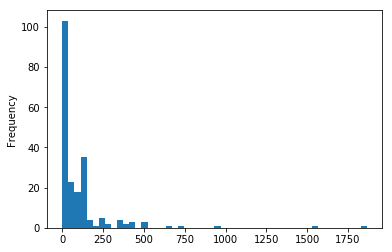

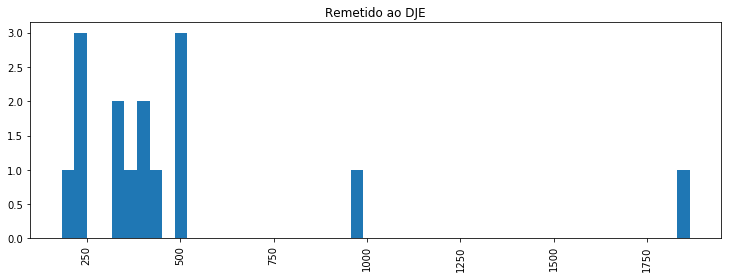

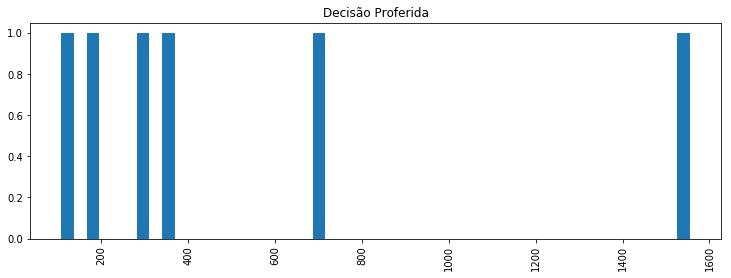

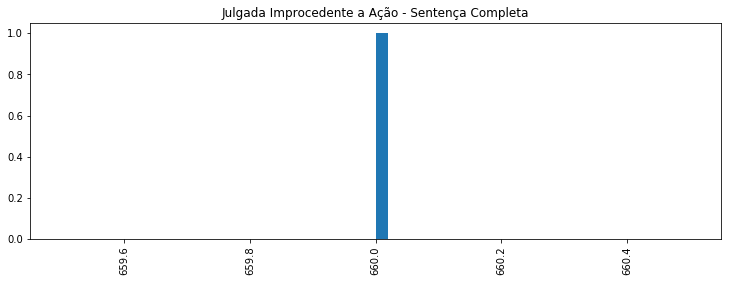

In [245]:
#Impressão das mensagens e enumeração
#for message_no, message in enumerate(messages[:10]):
#    print(message_no, message)
#    print('\n')
#Algumas estatísticas descritivas básicas das tags e messages
df_tags = pd.DataFrame(tags,columns = ['tags'])
df_messages = pd.DataFrame(messages, columns=['messages'])
#Criacao do df_descritivo a ser analisado
df_descritivo = pd.concat([df_tags,df_messages],axis=1)
df_descritivo.describe()
#Descrição das mensagens, agrupadas por tags
df_descritivo.groupby('tags').describe()
#Qualificação das mensagens de andamentos
df_descritivo['messages'] = df_descritivo['messages'].apply(proc.dq_msg)
df_descritivo['length'] = df_descritivo['messages'].apply(len)
#Distribuição do comprimento das mensagens de andamentos
df_descritivo['length'].plot(kind='hist', bins=50)
#Estatísticas descritivas do comprimentos das mensagens de andamentos
df_descritivo['length'].describe() 
#Análise da mensagem com maior numero de termos
df_descritivo.sort_values(['length'],ascending=False)[1:100]
#Analise de alguns comprimentos de mensagens relevantes
#length_msg = [15115, 14912, 12222, 12086, 11617, 11458, 11408, 11270, 11089, 11051] 
#for i in range(len(length_msg)):
#    print(df_descritivo[df_descritivo['length'] == length_msg[i]]['tags'].iloc[0])
#    #print(df_descritivo[df_descritivo['length'] == length_msg[i]]['messages'].iloc[0])
#Analise da distribuição do comprimento das mensagens de uma tag específica
tag_especifica = ['Remetido ao DJE', 'Decisão Proferida','Julgada Improcedente a Ação - Sentença Completa']
for i in range(len(tag_especifica)):
    df_descritivo[df_descritivo['tags'] == tag_especifica[i]].hist(column='length', by='tags', bins=50,figsize=(12,4))
#Visualização das stopwords em portugues
df_sw = pd.DataFrame(stopwords.words('portuguese'),columns=['stopwords']) # Cuidado o NÃO é uma stopword
df_sw.head()
#Visualizacao das tags e mensagens originais
df_descritivo.head()
#Visualizacao das mensagens "tokenized"
df_descritivo['messages'].head(5).apply(proc.text_process)

# Vectorization

Bag de palavras (bow)

In [247]:
bow = CountVectorizer(analyzer=proc.text_process).fit(df_descritivo['messages'])

## Exploração da BOW

In [258]:
#Quantidade de termos no dicionario
print(len(bow.vocabulary_)) #Numero de termos no vocabulario
#Termos do dicionario
bow.vocabulary_
#Selecao de uma message específica
m1 = df_descritivo['messages'][0]
#Veja a BOW da message
bow1 = bow.transform([m1])
print(bow1)
#Selecione o termo de maior frequencia
#print(bow.get_feature_names()[35934])
#Analise de termos relevantes
termos = bow.get_feature_names()
df_termos = pd.DataFrame(termos,columns=['termos'])
df_termos[df_termos['termos'].str.contains('valor')]
#Transformacao da BOW em um DataFrame esparso completo de mensagens
df_bow = bow.transform(df_descritivo['messages'])
#Algumas informações técnicas da BOW
print('Shape of Sparse Matrix: ', df_bow.shape)
print('Amount of Non-Zero occurences: ', df_bow.nnz)
sparsity = (100.0 * df_bow.nnz / (df_bow.shape[0] * df_bow.shape[1]))

697
  (0, 12)	1
  (0, 59)	1
  (0, 82)	1
  (0, 91)	1
  (0, 103)	1
  (0, 211)	2
  (0, 224)	1
  (0, 227)	1
  (0, 302)	1
  (0, 329)	1
  (0, 330)	1
  (0, 345)	1
Shape of Sparse Matrix:  (208, 697)
Amount of Non-Zero occurences:  2027


Peso e Normalização com TF-IDF

# TF-IDF

In [262]:
tfidf = TfidfTransformer().fit(df_bow)

## Exploração da TF-IDF

In [274]:
#Pesos dos termos em uma mensagem, usando TF-IDF 
tfidf1 = tfidf.transform(bow1)
print(tfidf1)
#Verificar apenas a IDF de termos relevantes
tfidf.idf_[bow.vocabulary_['valor']]
#Transforma as mensagens do TD_BOW em mensagens do DF_TFIDF
df_tfidf = tfidf.transform(df_bow)
#Analise da TF-IDF
print(df_descritivo.size)
print(df_tfidf)

  (0, 345)	0.177741860267
  (0, 330)	0.218162826091
  (0, 329)	0.218162826091
  (0, 302)	0.201543762523
  (0, 227)	0.218162826091
  (0, 224)	0.218162826091
  (0, 211)	0.397401440144
  (0, 103)	0.345246630706
  (0, 91)	0.345246630706
  (0, 82)	0.345246630706
  (0, 59)	0.345246630706
  (0, 12)	0.320466877323
624
  (0, 345)	0.177741860267
  (0, 330)	0.218162826091
  (0, 329)	0.218162826091
  (0, 302)	0.201543762523
  (0, 227)	0.218162826091
  (0, 224)	0.218162826091
  (0, 211)	0.397401440144
  (0, 103)	0.345246630706
  (0, 91)	0.345246630706
  (0, 82)	0.345246630706
  (0, 59)	0.345246630706
  (0, 12)	0.320466877323
  (1, 644)	0.216289054799
  (1, 639)	0.239633320848
  (1, 594)	0.239633320848
  (1, 548)	0.239633320848
  (1, 509)	0.216289054799
  (1, 483)	0.18025727109
  (1, 440)	0.216289054799
  (1, 420)	0.160363631464
  (1, 390)	0.166083473172
  (1, 383)	0.166083473172
  (1, 370)	0.1631341215
  (1, 359)	0.172623051475
  (1, 345)	0.132908812871
  :	:
  (201, 378)	0.221372862249
  (201, 371